#Proje 1 - Medikal Maliyet Analizi

***Proje Amacı:*** Verilen değişkenlere göre bir kişinin sağlık sigortasının yaklaşık ne kadar masraflı olacagını tahmin etmek.

### 1) Veri Setinin ve Kütüphanelerin Yüklenmesi

Veri Seti: https://www.kaggle.com/datasets/mirichoi0218/insurance

###Kolonlar
*   ***age:*** age of primary beneficiary
*   ***sex:*** insurance contractor gender, female, male
*   ***bmi:*** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   ***children:*** Number of children covered by health insurance / Number of dependents
*   ***smoker:*** Smoking
*   ***region:*** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   ***charges:*** Individual medical costs billed by health insurance

In [ ]:
#Kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

  #Scikit-learn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, Lars
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
#!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
#Veri setini yükleyelim
data = pd.read_csv('insurance.csv')
df = data.copy()

### 2) Keşifsel Veri Analizi

Veriyi inceleyerek, analiz ederek veriden anlamlı sonuçlar çıkarınız.
*   Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz
*   “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
*   “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.
*   “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
*   En çok “children”’a sahip “region”’ı bulunuz.
*   “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.
*   “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.
*   “bmi” değişkeninde outlier var mıdır? İnceleyiniz.
*   “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.
*   “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

In [ ]:
df.head()
#Yorum: Veri seti 6 değişken kolonu ve 1 hedef kolonu (charges) içermektedir

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape
#Yorum: Dataset 1338 satır içermektedir

(1338, 7)

In [ ]:
df.info()
#Yorum1: Null value bulunduran kolon bulunmamaktadır
#Yorum2: Dataset hem numerik hem kategorik değişkenler barındırmaktadır

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe().T
#Yorum: Numerik değişkenlerin ortalama(mean) ve medyanları(50%) birbirine yakındır 

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

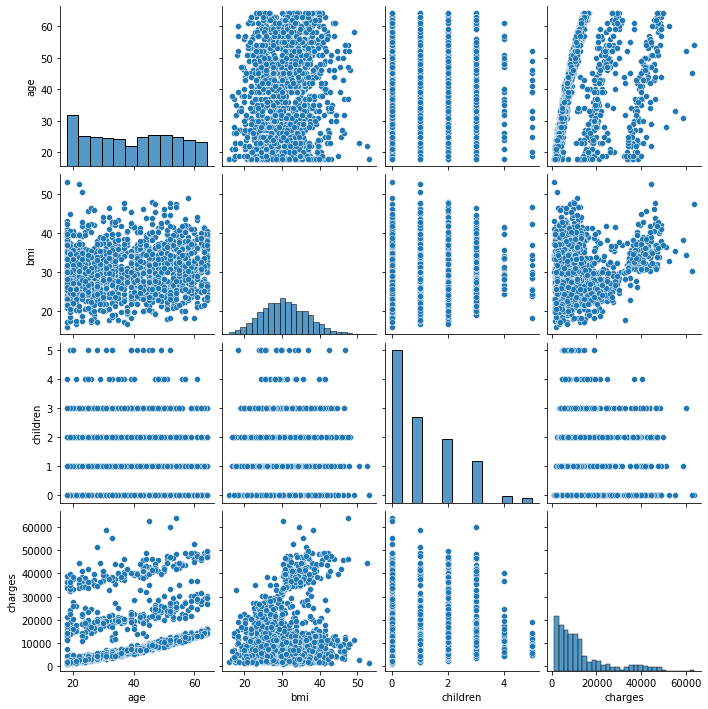

In [ ]:
#Numerik değişkenlerin grafiklerini inceleyelim
sns.pairplot(df, kind="scatter")
plt.show()

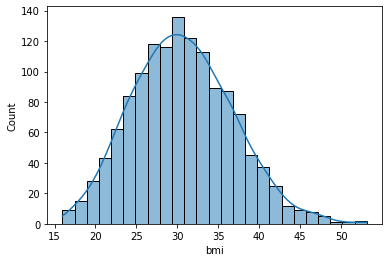

In [ ]:
#Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz
sns.histplot(data=df, x="bmi", kde = True);

#Yorum: Değişken neredeyse normal bir dağılıma sahiptir

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


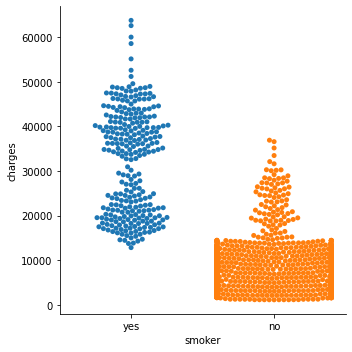

In [ ]:
#“smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
sns.catplot(x="smoker", y="charges", kind="swarm", data=df)

#Sigara içenler daha yüksek medikal maliyet ödüyor gibi durmaktadırlar

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58 



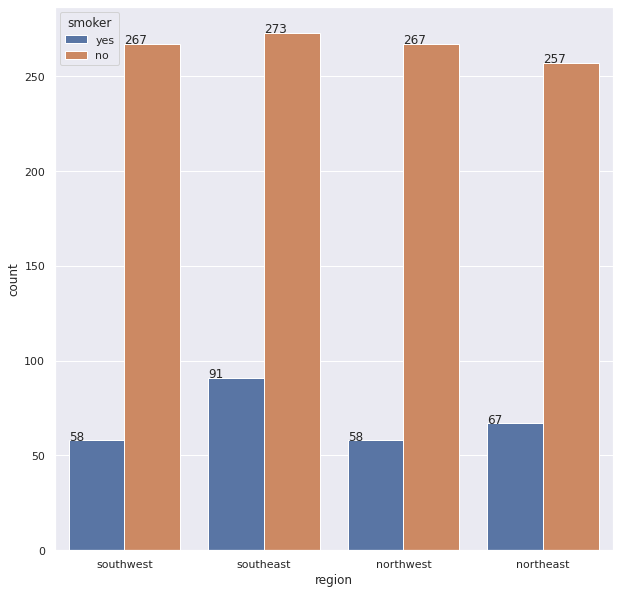

In [ ]:
#“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.
CrosstabResult=pd.crosstab(index=data['region'],columns=data['smoker'])
print(CrosstabResult, "\n")

#Görselleştirmek için count grafiği kullanalım
sns.set(rc = {'figure.figsize':(10,10)})
ax = sns.countplot(x='region', data=df, hue = "smoker")
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))

#Southeast bölgesinde diğer bölgelere göre daha çok sigara içen ve içmeyen kişi mevcuttur
#Soutwest ve northwest bölgeleri aynı sigara içmeyen kişi adedine sahiptir
#Northeast bölgesindeki sigara içmeyen kişi sayısı tüm bölgelere kıyasla daha azdır

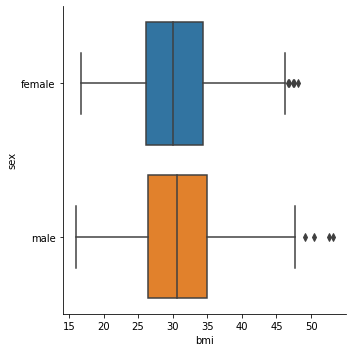

In [ ]:
#“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
sns.catplot(x="bmi", y="sex", kind="box", data=df)

#Yorum: İki değişken arasında anlamlı bir ilişki olduğu söylenemez

En çok çocuğa sahip bölge southeast bölgesidir.



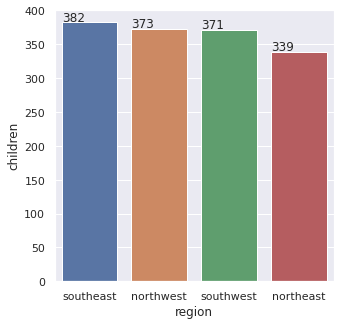

In [ ]:
#En çok “children”’a sahip “region”’ı bulunuz.
most_children_regions = df.groupby('region')['children'].sum().sort_values(ascending = False).reset_index() 
print(f"En çok çocuğa sahip bölge {most_children_regions['region'].values[0]} bölgesidir.\n")

#Görselleştirmek için bar grafiği kullanalım 
sns.set(rc = {'figure.figsize':(5,5)})
ax = sns.barplot(x='region', y='children', data=most_children_regions);
for p in ax.patches:
  ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+2))

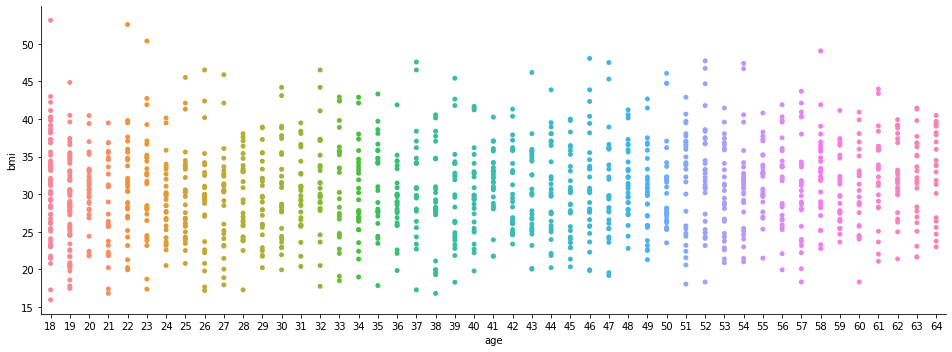

In [ ]:
#“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

fig = sns.catplot(x="age", y="bmi", jitter=False ,data=df)
fig.fig.set_size_inches(15,5) #yaşı daha iyi görebilmek için şekli uzatalım 

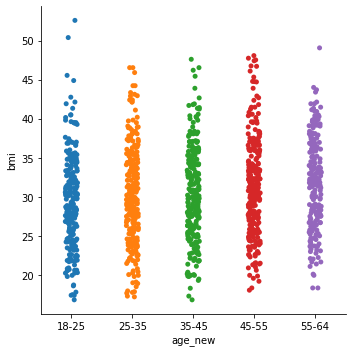

In [ ]:
#Daha iyi görebilmek adına yaşı gruplayalım
df['age_new'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, float('Inf')], labels=['18-25','25-35','35-45','45-55','55-64'])
fig = sns.catplot(x="age_new", y="bmi" ,data=df)

#Yorum: İki değişken arasında son derece zayıf bir ilişki bulunmaktadır.

In [ ]:
#Daha sonra sorun yaratmaması adına age_new kolonunu düşürelim
df = df.drop(['age_new'], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


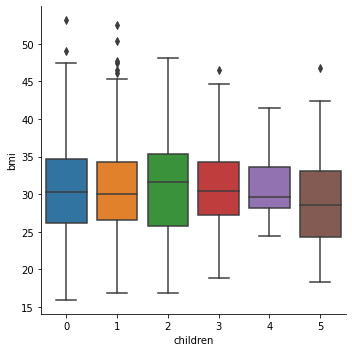

In [ ]:
#“bmi” ile “children” arasındaki ilişkiyi inceleyiniz.
sns.catplot(x="children", y="bmi", kind="box", data=df)

#Yorum: İki değişken arasında son derece zayıf bir ilişki bulunmaktadır.

Kartiller arası bölge : 8.3975 

********************************

BMI değişkeni için:
      - Düşük uç değer limiti 13.7, 
      - Yüksek uç değer limiti 47.29'dur.

****************************
Uç değerler:

      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270

****************************************


Text(0.5, 1.0, 'BMI index')

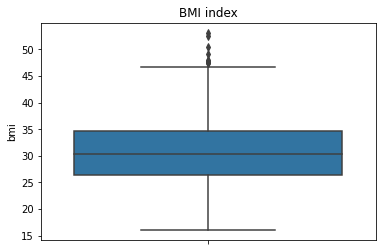

In [ ]:
#“bmi” değişkeninde outlier var mıdır? İnceleyiniz.
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3-Q1
print(f"Kartiller arası bölge : {IQR} \n")
print("********************************\n")
low_limit = np.round_(Q1- 1.5*IQR, 2)
upper_limit = np.round_(Q3 + 1.5*IQR, 2)
print(f"""BMI değişkeni için:
      - Düşük uç değer limiti {low_limit}, 
      - Yüksek uç değer limiti {upper_limit}'dur.""")
print("\n****************************")
print("Uç değerler:\n")
print(df[(df["bmi"] < low_limit) | (df["bmi"]>upper_limit)])
print("\n****************************************")
ax = sns.boxplot(data = df, y = "bmi");
ax.set_title('BMI index')

#Yorum: Evet outlierlar vardır, toplamda 9 adettirler

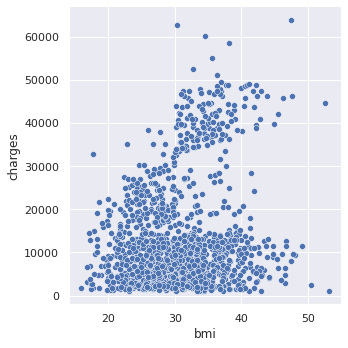

In [ ]:
#“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.
sns.relplot(x="bmi", y="charges", data=df)
 
#Yorum: Bmi'ı 20-30 arası olan bir kümenin 10-30 bin bandında, bmi'ı 30-40 arası olan bir diğer kümenin ise 30-50 bin bandında, harcama yaptığı görülebilir. 

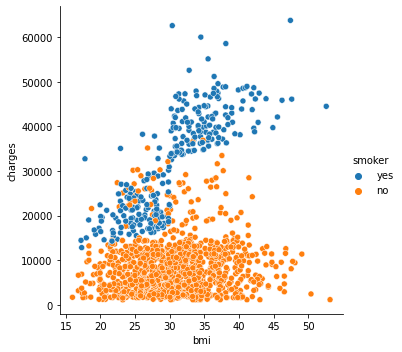

In [ ]:
#Daha iyi anlayabilmek adına başka bir değişken ile birlikte bakalım
sns.relplot(x="bmi", y="charges", hue='smoker' ,data=df)

#Yorum: Sigara içen ve bmi 20-30 arası kişiler 10-30 bin bandında, sigara içen ve bmi 30-45 arası insanlar 30-50 bin bandında medikal masraf yapmaktadırlar.

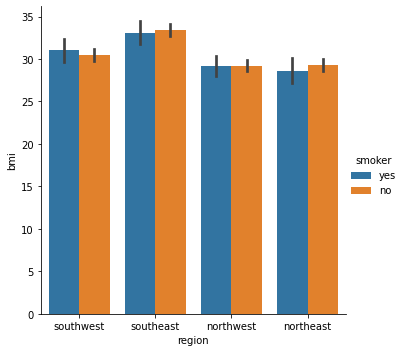

In [ ]:
#“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.
sns.catplot(x="region", y="bmi", hue="smoker", kind="bar", data=df)

#Yorum: Southeast bölgesindeki kişilerin bmi değeri diğerlerine kıyasla biraz daha fazladır.

### 3) Veri Ön İşleme

*   Bu kısımda elinizde olan veriyi model eğitmek için hazır hale getiriniz.
*   Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini kullanınız.
*   Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.
*   Veri setini normalize ederek ölçekleyiniz.

In [ ]:
#Hangi kolonların encoding ihtiyacı var görmek adına veri setimizi tekrar inceleyelim.
print(df.head(5))
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
#Hangi kolonların kategorik olduğunu inceleyelim
insurance_obj = df.select_dtypes(include='object').columns
print(insurance_obj)

#Object tipli değişkenleri kategorik değişkenlere çevirelim
df[insurance_obj] = df[insurance_obj].astype('category')
obj_len = len(df.select_dtypes(include='object').columns)
print(obj_len)

Index(['sex', 'smoker', 'region'], dtype='object')
0


###Label Encoding vs One-Hot Encoding
Veride 3 adet kategorik değişken görmekteyiz: Sex, Smoker, Region. Bu kolonları regresyon algoritmalarının anlayabilmesi adına numerik kolonlara çevirmemiz gerekmektedir. Bunu iki şekilde yapabiliriz: One-Hot Encoding ve Label Encoding.

Region değişkeninin değerleri sıralı değildir, örneğin southeast > southwest gibi bir ifade mantıken doğru olmayacaktır çünkü ikisi arasında matematiksel olarak ayırt edici bir kavram yoktur. Eğer Label Encoding kullanarak bu bölgelere 1,2,3,4 sayılarını vermeye kalkarsak model bu bölgeler arasında sayısal bir ilişki aramaya kalkabileceğinden bu bölgelerin her birinin 1-0 ile ifade edilen eşit ağırlıkta değişken kolonları olmaları modelin kolonları doğru anlaması açısından daha yararlıdır. Bu sebeple Region değişkeni için One-Hot Encoding kullanmalıyız

Ama smoker ve sex kolonları için sadece iki tip değerimiz olduğundan One Hot Encoding uygulamak ile Label Encoding uygulamak aynı şey olacaktır. Dolayısıyla bu kolonlar için Label Encoding kullanabiliriz.

In [ ]:
#Smoker ve sex kolonları için Label Encoding
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
print(df.sex.value_counts())
print(df.smoker.value_counts())

1    676
0    662
Name: sex, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64


In [ ]:
#Region kolonu için One Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore')
region_names = ["region_southwest", "region_southeast","region_northwest","region_northeast"]
region_ohe_df = pd.DataFrame(ohe.fit_transform(df[['region']]).toarray(), columns = region_names)
df = df.drop(['region'], axis=1)
df = df.join(region_ohe_df)
df.head()

,age,sex,bmi,children,smoker,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


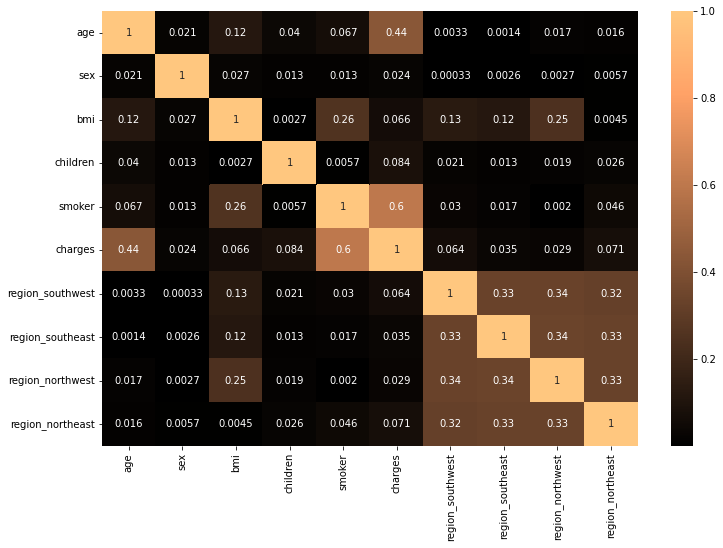

In [ ]:
#Değişkenlerin birbirleriyle ve bağımlı değişken ile olan korelasyonlarını inceleyelim
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(abs(df.corr()), annot = True, linewidths = 0., cmap = "copper");


In [ ]:
#Hedef değişkeni ve tahmin değişkenlerini hazırlayalım
X = df.drop('charges', axis = 1) #bağımsız değişkenler
y = df['charges'] #bağımlı değişken

In [ ]:
#Dataseti test ve train olarak ikiye ayır (80%: train, 20%: test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8, 
                                                    random_state = 100) #seed

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


In [ ]:
#Normalizasyon
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [ ]:
X_test_scaled.head()

,age,sex,bmi,children,smoker,region_southwest,region_southeast,region_northwest,region_northeast
0,0.021739,1.0,0.247915,0.0,0.0,0.0,1.0,0.0,0.0
1,0.608696,0.0,0.348130,0.4,0.0,0.0,0.0,0.0,1.0
2,0.847826,0.0,0.592951,0.4,0.0,0.0,0.0,0.0,1.0
3,0.978261,1.0,0.559726,0.0,0.0,1.0,0.0,0.0,0.0
4,0.608696,0.0,0.439602,0.4,0.0,1.0,0.0,0.0,0.0


### 4) Model Seçme

*   Birkaç regresyon modeli seçiniz bunları ön işleme yapılan veri ile eğitiniz.
*   Seçilen modellerin performanslarını çapraz doğrulama kullanarak inceleyiniz.
*   En iyi performans gösteren modeli seçiniz.

Sklearn lineer modelleri için:
https://scikit-learn.org/stable/modules/linear_model.html

In [ ]:
#Seçilen modelleri karşılaştırmak için bir fonksiyon yazalım
models = {'Linear Regression' : LinearRegression(),
          'Lasso Regression' : Lasso(),
          'Ridge Regression' : Ridge(),
          'Least Angle Regression' : Lars(),
          'SVR' : SVR(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'LightGBM' : LGBMRegressor(),
          'CatBoost' : CatBoostRegressor()}

def fit_and_score(models, X_train, y_train, X_test, y_test):
  model_R2 = {}
  model_MAE = {}
  model_MSE = {}
  model_RMSE = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    model_R2[name] =  r2_score(y_test, preds)
    model_MAE[name] = mean_absolute_error(y_test, preds)
    model_MSE[name] = mean_squared_error(y_test, preds)
    model_RMSE[name] = mean_squared_error(y_test, preds, squared = False)

  return model_R2, model_MAE, model_MSE, model_RMSE

In [ ]:
model_scores = fit_and_score(models = models,
                             X_train = X_train_scaled,
                             y_train = y_train,
                             X_test  = X_test_scaled,
                             y_test  = y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Learning rate set to 0.041383
0:	learn: 11614.3473107	total: 713us	remaining: 713ms
1:	learn: 11292.2747021	total: 1.66ms	remaining: 829ms
2:	learn: 10957.3219195	total: 2.46ms	remaining: 817ms
3:	learn: 10633.2574272	total: 3.25ms	remaining: 809ms
4:	learn: 10338.5255942	total: 7.54ms	remaining: 1.5s
5:	learn: 10038.2989515	total: 10.3ms	remaining: 1.7s
6:	learn: 9762.3586272	total: 12ms	remaining: 1.71s
7:	learn: 9506.8140885	total: 12.9ms	remaining: 1.6s
8:	learn: 9254.7093735	total: 13.7ms	remaining: 1.51s
9:	learn: 9022.0173489	total: 14.7ms	remaining: 1.45s
10:	learn: 8800.0341778	total: 15.5ms	remaining: 1.4s
11:	learn: 8566.7886343	total: 16.2ms	remaining: 1.33s
12:	learn: 8352.8397483	total: 17ms	remaining: 1.29s
13:	learn: 8145.8480020	total: 17.8ms	remaining: 1.25s
14:	learn: 7955.3768197	total: 18.6ms	remaining: 1.22s
15:	learn: 7765.6538467	total: 19.8ms	remaining: 1.22s
16:	learn: 7584.8097227	total: 20.6ms	remaining: 1.19s
17:	learn: 7417.8663074	total: 21.8ms	remaining:

In [ ]:
model_scores

({'Linear Regression': 0.7939303176862286,
  'Lasso Regression': 0.794636895297099,
  'Ridge Regression': 0.7936680555594997,
  'Least Angle Regression': 0.7946968492150804,
  'SVR': -0.1480445217524735,
  'KNeighborsRegressor': 0.8102056325163326,
  'RandomForestRegressor': 0.8705582765688471,
  'LightGBM': 0.8853206045856717,
  'CatBoost': 0.8857656041231124},
 {'Linear Regression': 3899.211480033582,
  'Lasso Regression': 3915.5349155682993,
  'Ridge Regression': 3919.352309651795,
  'Least Angle Regression': 3916.4377758105966,
  'SVR': 8646.72898485913,
  'KNeighborsRegressor': 3541.59602383209,
  'RandomForestRegressor': 2740.9579228195594,
  'LightGBM': 2712.5941530565874,
  'CatBoost': 2621.657265318265},
 {'Linear Regression': 32313391.380856678,
  'Lasso Regression': 32202594.301807262,
  'Ridge Regression': 32354516.201597955,
  'Least Angle Regression': 32193193.04299618,
  'SVR': 180022658.05190182,
  'KNeighborsRegressor': 29761290.4990247,
  'RandomForestRegressor': 2029

En iyi sonuçları KNeighborsRegressor, RandomForestRegressor, LightGBM ve CatBoost veriyor, bir de cross validation ile deneyelim. 

> Daha fazla bilgi için: https://scikit-learn.org/stable/modules/cross_validation.html



In [ ]:
#Cross Validation ile Model Performansı
models = {'Linear Regression' : LinearRegression(), #name, model
          'Lasso Regression' : Lasso(),
          'Ridge Regression' : Ridge(),
          'Least Angle Regression' : Lars(),
          'SVR' : SVR(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'LightGBM' : LGBMRegressor(),
          'CatBoost' : CatBoostRegressor()}

def fit_and_cv(models, X_train, y_train, X, y):
  cv_R2 = {}

  for name, model in models.items():
    model_reg = model.fit(X_train, y_train)
    cv_R2[name] = np.mean(cross_val_score(model_reg, X, y, cv=10, scoring='r2'))

  return cv_R2

In [ ]:
cv_scores = fit_and_cv(models = models,
                      X_train = X_train_scaled,
                      y_train = y_train,
                      X  = X_scaled,
                      y  = y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

Görüntülenen çıkış son 5000 satıra kısaltıldı.
4:	learn: 10475.0122197	total: 6.12ms	remaining: 1.22s
5:	learn: 10159.7656917	total: 7.37ms	remaining: 1.22s
6:	learn: 9870.1988750	total: 8.77ms	remaining: 1.24s
7:	learn: 9596.6686370	total: 10.1ms	remaining: 1.25s
8:	learn: 9329.4106250	total: 11.3ms	remaining: 1.24s
9:	learn: 9084.9262812	total: 16.8ms	remaining: 1.66s
10:	learn: 8853.8482274	total: 17.8ms	remaining: 1.6s
11:	learn: 8610.5144464	total: 19ms	remaining: 1.56s
12:	learn: 8395.5814616	total: 21.8ms	remaining: 1.66s
13:	learn: 8181.0447991	total: 23ms	remaining: 1.62s
14:	learn: 7981.1261687	total: 28.5ms	remaining: 1.87s
15:	learn: 7789.9631118	total: 29.6ms	remaining: 1.82s
16:	learn: 7599.2047899	total: 30.3ms	remaining: 1.75s
17:	learn: 7426.7228793	total: 34.4ms	remaining: 1.88s
18:	learn: 7266.7944752	total: 35.5ms	remaining: 1.83s
19:	learn: 7108.4416244	total: 36.5ms	remaining: 1.79s
20:	learn: 6955.1818262	total: 37.8ms	remaining: 1.76s
21:	learn: 6815.1323039	tot

In [ ]:
cv_results = pd.DataFrame(cv_scores, index = ['cross validation'])
cv_results #accuracy values

,Linear Regression,Lasso Regression,Ridge Regression,Least Angle Regression,SVR,KNeighborsRegressor,RandomForestRegressor,LightGBM,CatBoost
cross validation,0.744477,0.744512,0.744544,0.744527,-0.1017,0.770236,0.835095,0.841559,0.841656


En yüksek cv sonucunu veren CatBoost ile devam edelim.

### 5) Hiper-parametre Optimizasyonu

*   Bir önceki adımda seçilen modelin hiper-parametrelerinin optimize ediniz.
*   Grid Search ile parametreleri optimize ediniz.

Grid Search ve Hyper-Parameter Tuning ile ilgili daha fazla bilgi için: https://scikit-learn.org/stable/modules/grid_search.html

CatBoost Parametreleri için: https://catboost.ai/en/docs/concepts/python-reference_catboostregressor

In [114]:
#Lineer modeli tekil olarak yeniden yaratalım
catb_reg = CatBoostRegressor().fit(X_train_scaled, y_train)

Learning rate set to 0.041383
0:	learn: 11614.3473107	total: 659us	remaining: 659ms
1:	learn: 11292.2747021	total: 3.48ms	remaining: 1.74s
2:	learn: 10957.3219195	total: 5.28ms	remaining: 1.75s
3:	learn: 10633.2574272	total: 6.95ms	remaining: 1.73s
4:	learn: 10338.5255942	total: 8.07ms	remaining: 1.61s
5:	learn: 10038.2989515	total: 9.21ms	remaining: 1.52s
6:	learn: 9762.3586272	total: 10.3ms	remaining: 1.46s
7:	learn: 9506.8140885	total: 11.4ms	remaining: 1.42s
8:	learn: 9254.7093735	total: 12.5ms	remaining: 1.38s
9:	learn: 9022.0173489	total: 13.7ms	remaining: 1.36s
10:	learn: 8800.0341778	total: 14.8ms	remaining: 1.33s
11:	learn: 8566.7886343	total: 15.8ms	remaining: 1.3s
12:	learn: 8352.8397483	total: 17.6ms	remaining: 1.34s
13:	learn: 8145.8480020	total: 18.8ms	remaining: 1.32s
14:	learn: 7955.3768197	total: 19.9ms	remaining: 1.31s
15:	learn: 7765.6538467	total: 21.1ms	remaining: 1.29s
16:	learn: 7584.8097227	total: 22ms	remaining: 1.27s
17:	learn: 7417.8663074	total: 23.1ms	remai

In [115]:
#denemek istediğimiz parametreler için arama uzayını oluşturalım
space = dict()
space['learning_rate'] = [0.03, 0.1]
space['depth'] = [4, 6, 10]
space['l2_leaf_reg'] = [1, 3, 5, 7, 9]

In [116]:
#Grid Search kullanarak en iyi hyperparametreleri araştıralım
search = GridSearchCV(catb_reg, space)
result = search.fit(X_scaled, y)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
0:	learn: 11398.7257611	total: 698us	remaining: 697ms
1:	learn: 10782.3629750	total: 5.69ms	remaining: 2.84s
2:	learn: 10240.3031298	total: 7.56ms	remaining: 2.51s
3:	learn: 9625.2920655	total: 8.4ms	remaining: 2.09s
4:	learn: 9217.8987883	total: 11.4ms	remaining: 2.27s
5:	learn: 8673.2177464	total: 12.4ms	remaining: 2.05s
6:	learn: 8251.0106513	total: 13.6ms	remaining: 1.92s
7:	learn: 7845.5439807	total: 15.3ms	remaining: 1.9s
8:	learn: 7480.2240465	total: 16.5ms	remaining: 1.82s
9:	learn: 7249.1987435	total: 20.4ms	remaining: 2.02s
10:	learn: 6953.5193177	total: 22ms	remaining: 1.98s
11:	learn: 6708.1667438	total: 25.1ms	remaining: 2.07s
12:	learn: 6436.0852272	total: 25.8ms	remaining: 1.96s
13:	learn: 6168.8077577	total: 26.7ms	remaining: 1.88s
14:	learn: 5955.5887780	total: 28.9ms	remaining: 1.9s
15:	learn: 5726.6021013	total: 29.9ms	remaining: 1.84s
16:	learn: 5588.7177076	total: 32ms	remaining: 1.85s
17:	learn: 5418.2106762	total: 33

In [117]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8577273074962497
Best Hyperparameters: {'depth': 4, 'l2_leaf_reg': 9, 'learning_rate': 0.03}


In [119]:
#Şimdi modelimizin son halini en iyi parametreleri ile hazırlayalım
catb_tuned = CatBoostRegressor(depth=4, l2_leaf_reg=9, learning_rate=0.03).fit(X_train_scaled, y_train)

0:	learn: 11741.4292108	total: 512us	remaining: 512ms
1:	learn: 11513.9436217	total: 2.81ms	remaining: 1.4s
2:	learn: 11315.2804899	total: 4.25ms	remaining: 1.41s
3:	learn: 11084.3284466	total: 5.13ms	remaining: 1.28s
4:	learn: 10887.7721772	total: 5.95ms	remaining: 1.18s
5:	learn: 10694.2468191	total: 6.72ms	remaining: 1.11s
6:	learn: 10516.0030073	total: 7.47ms	remaining: 1.06s
7:	learn: 10307.1659696	total: 8.42ms	remaining: 1.04s
8:	learn: 10106.6482632	total: 9.19ms	remaining: 1.01s
9:	learn: 9905.5775227	total: 9.99ms	remaining: 989ms
10:	learn: 9718.0814051	total: 10.8ms	remaining: 969ms
11:	learn: 9531.9851940	total: 11.5ms	remaining: 950ms
12:	learn: 9371.4654508	total: 12.3ms	remaining: 937ms
13:	learn: 9210.1073189	total: 13.1ms	remaining: 923ms
14:	learn: 9057.4152681	total: 13.9ms	remaining: 913ms
15:	learn: 8916.9790408	total: 14.7ms	remaining: 903ms
16:	learn: 8751.3976651	total: 15.5ms	remaining: 895ms
17:	learn: 8597.0552850	total: 16.2ms	remaining: 885ms
18:	learn: 84

### 6) Modeli Değerlendirme

*   Regresyon modeli değerlendirme metriklerini kullanarak optimize edilmiş olan
modelin değerlendirmesini yapınız.

In [120]:
#Regresyon değerlendirmesi
preds = catb_tuned.predict(X_test_scaled)
R2 =  r2_score(y_test, preds)
MAE = mean_absolute_error(y_test, preds)
MSE = mean_squared_error(y_test, preds)
RMSE = mean_squared_error(y_test, preds, squared = False)

print(f"""Hyperparameter Tuning yapılmış CatBoostRegressor modeli için:
          R2: {R2}
          MAE: {MAE}
          MSE: {MSE}
          RMSE: {RMSE}     
          RMSE / MAE: {RMSE/MAE} """)

Hyperparameter Tuning yapılmış CatBoostRegressor modeli için:
          R2: 0.9018992656351004
          MAE: 2280.574321411652
          MSE: 15382987.874245934
          RMSE: 3922.1152295981738     
          RMSE / MAE: 1.7197927700818911 


Modelimiz değerleri %90 oranında doğru tahmin ediyor, fakat değerler arasındaki hata büyük. Outlierlar ile ilgilenilerek yeniden denenilebilinir.

In [121]:
test_pred = catb_tuned.predict(X_test_scaled)
act_pred = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
act_pred

,Actual,Predicted
12,1826.84300,3530.902366
306,20177.67113,6192.603179
318,7421.19455,9150.616236
815,1877.92940,3118.484978
157,15518.18025,16335.249456
...,...,...
713,1984.45330,3973.879457
1282,14283.45940,14428.717852
531,14043.47670,15046.814152
537,8825.08600,9958.527477


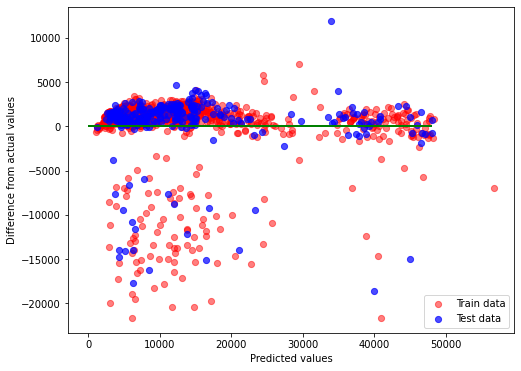

In [122]:
#Model performansını görselleştirelim
train_pred = catb_tuned.predict(X_train_scaled)
test_pred = catb_tuned.predict(X_test_scaled)
max_prediction = max(act_pred['Predicted'])

plt.figure(figsize=(8,6))

plt.scatter(train_pred, train_pred - y_train,
          c = 'red', marker = 'o', s = 38, alpha = 0.5,
          label = 'Train data');
plt.scatter(test_pred, test_pred - y_test,
          c = 'blue', marker = 'o', s = 38, alpha = 0.7,
          label = 'Test data');
plt.xlabel('Predicted values')
plt.ylabel('Difference from actual values')
plt.legend(loc = 'lower right')
plt.hlines(y = 0, xmin = 0, xmax = max_prediction, lw = 2, color = 'green');


Görüldüğü üzere model %90 olarak doğru tahminleme yapsa da uç değerler sebebiyle sapması yüksek olmakta, dolayısıyla MAE, MSE ve RMSE değerleri yüksek çıkmaktadır.